<a href="https://colab.research.google.com/github/EzpieCo/PyTorch-Crash-Course/blob/main/03-pytorch-binary-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 Binary Classification with PyTorch

GitHub repository: https://github.com/EzpieCo/PyTorch-Crash-Course

Crash Course: https://ezpie.vercel.app/courses/machine-learning

In case of an question: https://github.com/EzpieCo/PyTorch-Crash-Course/discussions

---

In Binary classification our main objective is to predict weather a given value is one thing or another, ex. is it spam or not spam? Is it a cat or a dog?

## Chapter: Creating a dataset for binary classification

In order to classify any data, we first need some data!

To do this we will use sklearn, another fun library for machine learning(well they did said python is for machine learning not backend).

We will use the [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) method from `sklearn.datasets` to make our dataset of 2 different types of classes.

In [12]:
#@title importing the dependencies

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

torch.__version__ # Just to check

'2.0.1+cu118'

In [13]:
#@title Create data of two classes(two different values)
X, y = make_blobs(n_samples=1000,
                            n_features=2, # number of features, here we have the x and y(x2 more like) as features
                            centers=2, # number of classes
                            cluster_std=1.5, # some randomness in data
                            random_state=42)

In [14]:
#@title Convert X and y into torch data type of float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [15]:
#@title Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

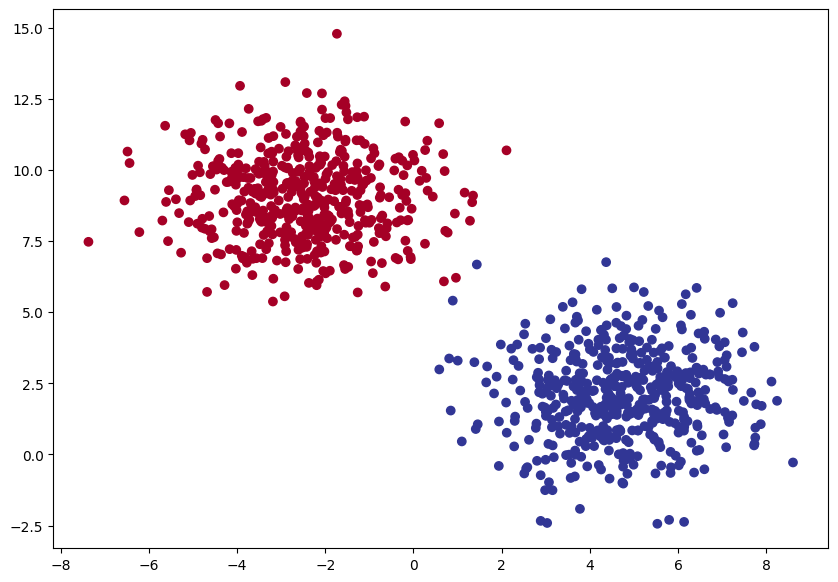

In [16]:
#@title Plot data for better visulization
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], # first feature - x1
            X[:, 1], # second feature - x2
            c=y, cmap=plt.cm.RdYlBu) # color the output

In [17]:
#@title setup device agnostic

# Create device agnostic
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Chapter: Creating the model

Now we will create the model that can learn patterns in our dataset.

In [38]:
#@title creating the model

from torch import nn

class BlobClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 2)

  def forward(self, x):
    return self.layer1(x)

model1 = BlobClassification().to(device)
model1

BlobClassification(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
)

In [39]:
#@title faster way of making a neural network

model2 = nn.Sequential(
    nn.Linear(2, 2)
).to(device)

model2

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
)